In [1]:
%matplotlib inline

Useful:
* Bayesian Inference for a Covariance Matrix (Ignacio Alvarez, Jarad Niemi, and Matt Simpson)
    * Inverse-Wishart won't work for small correlation?

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt
import collections
npr.seed(225)

In [3]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 5.5, 3.5

# Create Data

In [4]:
N = 50 # number of data
D = 8 # dimensions
max_mean = 0.8
max_cov = 0.15

mean_vec = npr.normal(max_mean/2, 1, D)
cov_mat = sps.invwishart.rvs(D+1, npr.uniform(max_cov/2, max_cov, D) )
data = npr.multivariate_normal(mean_vec, cov_mat, N)

# Iterations

In [5]:
iter_num = 1500
show_num = 1200

# Prepare priors
## mean
mu_0 = np.repeat(0, D)
cov_0 = np.diag(np.repeat(0.5, D))

## cov
nu = D + 1
psi = np.identity(D) # I am not sure what is proper

# Initialization
mean_itr = npr.uniform(0, max_mean*2, D)
cov_itr = sps.invwishart.rvs(nu, psi)

In [6]:
# Iteration
mean_chain = []
cov_chain = []
for i in range(iter_num):
    # Update mean
    cov0_inv = np.linalg.inv(cov_0)
    cov_inv = np.linalg.inv(cov_itr)
    cov_tmp = np.linalg.inv( cov0_inv  + N * cov_inv )
    mean_tmp = cov_tmp.dot( cov0_inv.dot(mu_0) + N * np.dot(cov_inv,  data.mean(axis=0)) )
    mean_itr = npr.multivariate_normal(mean_tmp, cov_tmp, 1)

    mean_chain.append(mean_itr[0])

    # Update cov
    data_demean = data - mean_itr
    scale_tmp = psi + (data_demean.transpose()).dot(data_demean)

    cov_itr = sps.invwishart.rvs(N+1, scale_tmp)

    cov_chain.append(cov_itr)

mean_chain = np.array(mean_chain)
cov_chain = np.array(cov_chain)

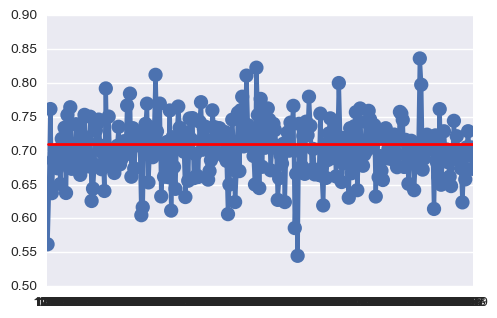

In [7]:
dim = 0
sns.pointplot(x=np.arange(show_num, iter_num, 1), y=mean_chain[show_num: , dim])
plt.plot([0, iter_num-show_num], [mean_vec[dim], mean_vec[dim]], linewidth=2, color='red')

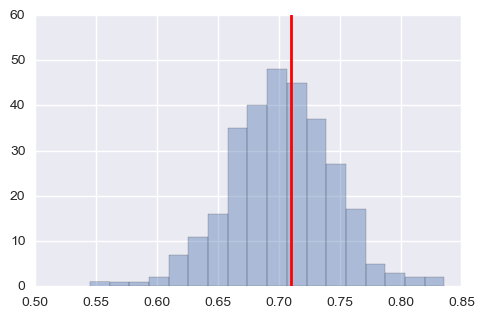

In [8]:
dim = 0
sns.distplot(mean_chain[show_num: , dim], hist=True, kde=False)
plt.plot([mean_vec[dim], mean_vec[dim]], [0, (iter_num-show_num)*0.2], linewidth=2, color='red')

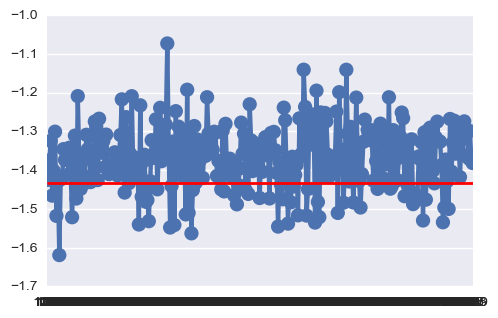

In [9]:
dim = 1
sns.pointplot(x=np.arange(show_num, iter_num, 1), y=mean_chain[show_num: , dim])
plt.plot([0, iter_num-show_num], [mean_vec[dim], mean_vec[dim]], linewidth=2, color='red')

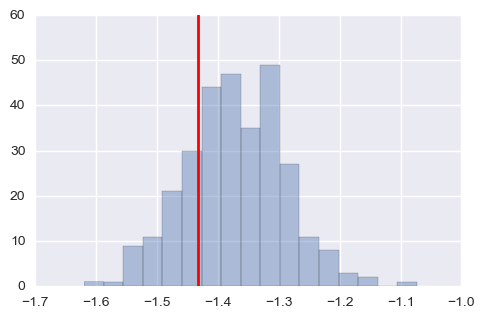

In [10]:
dim = 1
sns.distplot(mean_chain[show_num: , dim], hist=True, kde=False)
plt.plot([mean_vec[dim], mean_vec[dim]], [0, (iter_num-show_num)*0.2], linewidth=2, color='red')

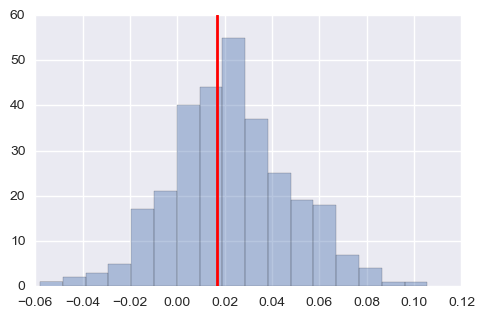

In [11]:
index = (1,0)
sns.distplot(cov_chain[show_num:, index[0], index[1]], hist=True, kde=False)
plt.plot([cov_mat[index[0], index[1]], cov_mat[index[0], index[1]]], [0, (iter_num-show_num)*0.2], linewidth=2, color='red')

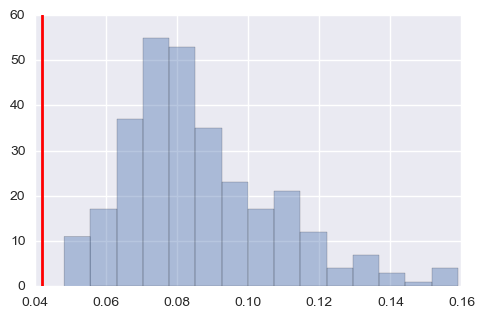

In [12]:
index = (0,0)
sns.distplot(cov_chain[show_num:, index[0], index[1]], hist=True, kde=False)
plt.plot([cov_mat[index[0], index[1]], cov_mat[index[0], index[1]]], [0, (iter_num-show_num)*0.2], linewidth=2, color='red')

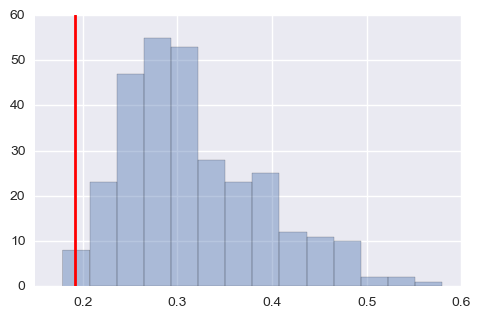

In [13]:
index = (1,1)
sns.distplot(cov_chain[show_num:, index[0], index[1]], hist=True, kde=False)
plt.plot([cov_mat[index[0], index[1]], cov_mat[index[0], index[1]]], [0, (iter_num-show_num)*0.2], linewidth=2, color='red')